# Python para finanças - simulação Monte Carlos para previsão de preços de ações

## Importação das bibliotecas e preparação da base de dados

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
from scipy import stats

In [3]:
dataset = pd.read_csv('acoes.csv')
dataset

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,14.990000,15.20,11.846200,0.232812,35.732101,47.259998
1,2015-01-05,14.850000,15.00,11.926900,0.237187,34.634201,46.320000
2,2015-01-06,15.210000,14.80,11.750000,0.234062,32.468300,46.580002
3,2015-01-07,14.550000,14.67,11.615400,0.241875,32.238701,48.150002
4,2015-01-08,14.270000,14.15,11.811500,0.240000,32.987301,48.509998
...,...,...,...,...,...,...,...
1441,2020-10-27,18.600000,14.17,83.239998,25.450001,28.500000,95.800003
1442,2020-10-28,16.920000,12.77,79.139999,24.629999,27.500000,92.430000
1443,2020-10-29,16.610001,12.68,80.029999,25.360001,28.500000,92.910004
1444,2020-10-30,15.690000,12.28,75.830002,24.629999,27.000000,90.660004


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
figura = px.line(title = 'Histórico do preço das ações')
for i in dataset.columns[1:]:
  figura.add_scatter(x = dataset['Date'], y = dataset[i], name = i)
figura.show()

In [7]:
dataset = pd.DataFrame(dataset['BOVA'])
dataset

,BOVA
0,47.259998
1,46.320000
2,46.580002
3,48.150002
4,48.509998
...,...
1441,95.800003
1442,92.430000
1443,92.910004
1444,90.660004


In [8]:
dataset_normalizado = dataset.copy()
for i in dataset:
  dataset_normalizado[i] = dataset[i] / dataset[i][0]
dataset_normalizado

,BOVA
0,1.000000
1,0.980110
2,0.985612
3,1.018832
4,1.026449
...,...
1441,2.027084
1442,1.955777
1443,1.965933
1444,1.918324


In [9]:
dataset_taxa_retorno = np.log(1 + dataset_normalizado.pct_change())
dataset_taxa_retorno

,BOVA
0,NaN
1,-0.020090
2,0.005597
3,0.033150
4,0.007449
...,...
1441,-0.010074
1442,-0.035811
1443,0.005180
1444,-0.024515


In [10]:
dataset_taxa_retorno.fillna(0, inplace=True)
dataset_taxa_retorno.head()

,BOVA
0,0.000000
1,-0.020090
2,0.005597
3,0.033150
4,0.007449


## Cálculo do drift

In [12]:
media = dataset_taxa_retorno.mean()
media

BOVA    0.000464
dtype: float64

In [13]:
variancia = dataset_taxa_retorno.var()
variancia

BOVA    0.000304
dtype: float64

In [14]:
drift = media - (0.5 * variancia)
drift

BOVA    0.000312
dtype: float64

## Cálculo dos retornos diários

In [15]:
dias_frente = 50
simulacoes = 10

In [16]:
desvio_padrao = dataset_taxa_retorno.std()
desvio_padrao

BOVA    0.017426
dtype: float64

In [18]:
Z = stats.norm.ppf(np.random.rand(dias_frente, simulacoes))

In [19]:
Z.shape

(50, 10)

In [21]:
Z

array([[ 2.51346735e-01,  1.13340426e+00, -1.74609832e+00,
         8.94187878e-01,  9.91541813e-01,  5.26777975e-01,
         1.25958223e+00, -4.08185442e-01, -4.59206196e-01,
         2.20000865e+00],
       [-1.60124431e+00, -1.31486224e+00, -1.72575881e-01,
         1.27710104e+00, -3.57043984e-01,  1.12744149e+00,
        -4.06239832e-01,  7.55071274e-02, -6.90545276e-01,
         8.86771579e-01],
       [-6.88144593e-01,  8.12214323e-01,  6.46037594e-03,
         1.24896192e-01, -3.89150264e-01,  2.86057663e-01,
         3.59630003e-01,  1.52115346e+00, -5.42810357e-01,
         1.17477850e+00],
       [-2.33374160e-02, -8.75261475e-01, -1.21864732e+00,
         1.80759484e-01,  1.25770184e+00,  4.51423809e-01,
        -2.54305796e-01,  9.83602184e-01,  5.02855568e-01,
         7.91395927e-01],
       [-9.44596377e-01, -1.06080059e+00,  9.85142621e-01,
         9.57631728e-02,  1.84567933e+00, -1.37819026e-01,
        -1.23181556e-01,  1.00653648e-02, -7.29534557e-01,
         8.

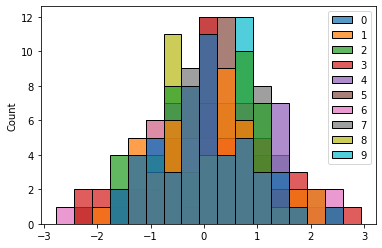

In [22]:
sns.histplot(Z);

In [23]:
Z

array([[ 2.51346735e-01,  1.13340426e+00, -1.74609832e+00,
         8.94187878e-01,  9.91541813e-01,  5.26777975e-01,
         1.25958223e+00, -4.08185442e-01, -4.59206196e-01,
         2.20000865e+00],
       [-1.60124431e+00, -1.31486224e+00, -1.72575881e-01,
         1.27710104e+00, -3.57043984e-01,  1.12744149e+00,
        -4.06239832e-01,  7.55071274e-02, -6.90545276e-01,
         8.86771579e-01],
       [-6.88144593e-01,  8.12214323e-01,  6.46037594e-03,
         1.24896192e-01, -3.89150264e-01,  2.86057663e-01,
         3.59630003e-01,  1.52115346e+00, -5.42810357e-01,
         1.17477850e+00],
       [-2.33374160e-02, -8.75261475e-01, -1.21864732e+00,
         1.80759484e-01,  1.25770184e+00,  4.51423809e-01,
        -2.54305796e-01,  9.83602184e-01,  5.02855568e-01,
         7.91395927e-01],
       [-9.44596377e-01, -1.06080059e+00,  9.85142621e-01,
         9.57631728e-02,  1.84567933e+00, -1.37819026e-01,
        -1.23181556e-01,  1.00653648e-02, -7.29534557e-01,
         8.

In [24]:
retornos_diarios = np.exp(drift.values + desvio_padrao.values * Z)

In [25]:
retornos_diarios.shape

(50, 10)

In [26]:
retornos_diarios

array([[1.00470287, 1.02026506, 0.97033359, 1.01602089, 1.017746  ,
        1.00953666, 1.02251085, 0.993222  , 0.99233934, 1.03940555],
       [0.97278601, 0.97765279, 0.99730826, 1.02282305, 0.99410754,
        1.02015906, 0.99325568, 1.00162901, 0.98834699, 1.01588959],
       [0.98838834, 1.01457058, 1.00042458, 1.00249143, 0.99355151,
        1.00531077, 1.00660046, 1.0271822 , 0.99089468, 1.02100092],
       [0.99990524, 0.98517078, 0.97929332, 1.0034678 , 1.02247734,
        1.0082119 , 0.99588889, 1.0176052 , 1.0091159 , 1.01420258],
       [0.98398119, 0.98199069, 1.01763252, 1.00198263, 1.03300752,
        0.99791248, 0.99816705, 1.00048743, 0.98767572, 1.01604319],
       [0.97973977, 1.00985976, 1.0132009 , 1.02032314, 0.97514243,
        0.98540938, 1.02385081, 0.99708575, 0.97293122, 0.98556579],
       [0.98641715, 0.99366064, 1.01489786, 1.00701382, 1.01462867,
        1.00155308, 1.01793027, 1.02118566, 1.02339637, 0.97904829],
       [0.99925236, 1.00958169, 0.9892590

## Previsões de preços futuros

In [27]:
previsoes = np.zeros_like(retornos_diarios)

In [28]:
previsoes.shape

(50, 10)

In [30]:
previsoes

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 

In [31]:
previsoes[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [34]:
dataset.tail(1)

,BOVA
1445,92.410004


In [36]:
dataset.iloc[-1]

BOVA    92.410004
Name: 1445, dtype: float64

In [37]:
previsoes[0] = dataset.iloc[-1]
previsoes

array([[92.41000366, 92.41000366, 92.41000366, 92.41000366, 92.41000366,
        92.41000366, 92.41000366, 92.41000366, 92.41000366, 92.41000366],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        

In [40]:
for dia in range(1, dias_frente):
  #print(dia)
  previsoes[dia] = previsoes[dia - 1] * retornos_diarios[dia]

In [42]:
previsoes

array([[ 92.41000366,  92.41000366,  92.41000366,  92.41000366,
         92.41000366,  92.41000366,  92.41000366,  92.41000366,
         92.41000366,  92.41000366],
       [ 89.89515854,  90.34489751,  92.16125972,  94.51908165,
         91.86548154,  94.27290208,  91.78676084,  92.56054085,
         91.33314925,  93.87836067],
       [ 88.85132656,  91.66127486,  92.20038949,  94.75456971,
         91.27308827,  94.77356337,  92.3925959 ,  95.07653975,
         90.50153169,  95.84989262],
       [ 88.84290715,  90.30200944,  90.29122558,  95.08315966,
         93.32466486,  95.55183392,  92.01275956,  96.75038168,
         91.32653485,  97.21120839],
       [ 87.41974977,  88.67573236,  91.88328751,  95.27167442,
         96.40508021,  95.35236739,  91.84410466,  96.79754054,
         90.20100075,  98.77078636],
       [ 85.64860571,  89.55005356,  93.09622954,  97.20789379,
         94.00868451,  93.96111709,  94.03466057,  96.51544857,
         87.7593694 ,  97.34510834],
       [ 8

In [43]:
previsoes.shape

(50, 10)

In [45]:
previsoes


array([[ 92.41000366,  92.41000366,  92.41000366,  92.41000366,
         92.41000366,  92.41000366,  92.41000366,  92.41000366,
         92.41000366,  92.41000366],
       [ 89.89515854,  90.34489751,  92.16125972,  94.51908165,
         91.86548154,  94.27290208,  91.78676084,  92.56054085,
         91.33314925,  93.87836067],
       [ 88.85132656,  91.66127486,  92.20038949,  94.75456971,
         91.27308827,  94.77356337,  92.3925959 ,  95.07653975,
         90.50153169,  95.84989262],
       [ 88.84290715,  90.30200944,  90.29122558,  95.08315966,
         93.32466486,  95.55183392,  92.01275956,  96.75038168,
         91.32653485,  97.21120839],
       [ 87.41974977,  88.67573236,  91.88328751,  95.27167442,
         96.40508021,  95.35236739,  91.84410466,  96.79754054,
         90.20100075,  98.77078636],
       [ 85.64860571,  89.55005356,  93.09622954,  97.20789379,
         94.00868451,  93.96111709,  94.03466057,  96.51544857,
         87.7593694 ,  97.34510834],
       [ 8

In [46]:
92.41000366 * 1.00854274

93.19943829466642

In [47]:
93.19943859 * 0.98145488

91.47104381741582

In [48]:
previsoes

array([[ 92.41000366,  92.41000366,  92.41000366,  92.41000366,
         92.41000366,  92.41000366,  92.41000366,  92.41000366,
         92.41000366,  92.41000366],
       [ 89.89515854,  90.34489751,  92.16125972,  94.51908165,
         91.86548154,  94.27290208,  91.78676084,  92.56054085,
         91.33314925,  93.87836067],
       [ 88.85132656,  91.66127486,  92.20038949,  94.75456971,
         91.27308827,  94.77356337,  92.3925959 ,  95.07653975,
         90.50153169,  95.84989262],
       [ 88.84290715,  90.30200944,  90.29122558,  95.08315966,
         93.32466486,  95.55183392,  92.01275956,  96.75038168,
         91.32653485,  97.21120839],
       [ 87.41974977,  88.67573236,  91.88328751,  95.27167442,
         96.40508021,  95.35236739,  91.84410466,  96.79754054,
         90.20100075,  98.77078636],
       [ 85.64860571,  89.55005356,  93.09622954,  97.20789379,
         94.00868451,  93.96111709,  94.03466057,  96.51544857,
         87.7593694 ,  97.34510834],
       [ 8

## Gráfico das previsões

In [49]:
len(previsoes)

50

In [50]:
previsoes.T.shape, previsoes.shape

((10, 50), (50, 10))

In [51]:
previsoes.T

array([[ 92.41000366,  89.89515854,  88.85132656,  88.84290715,
         87.41974977,  85.64860571,  84.48525343,  84.4220887 ,
         84.9250583 ,  85.02546013,  87.16664782,  87.242063  ,
         87.59959003,  87.19657446,  85.68038313,  85.64607323,
         86.63381168,  86.28956909,  83.96803464,  87.53887736,
         89.12878568,  91.26752858,  90.84877772,  89.53515435,
         89.05222185,  90.8209422 ,  88.89176555,  89.25154206,
         88.50848227,  86.38882595,  85.98591835,  84.09657475,
         85.3317246 ,  86.48891728,  88.78628398,  88.83876886,
         87.69241974,  87.66989272,  86.82165498,  89.47837675,
         89.91116853,  91.18940432,  91.34111601,  90.85175995,
         91.29357539,  90.6915575 ,  90.34112879,  92.32907208,
         92.43745417,  93.45555214],
       [ 92.41000366,  90.34489751,  91.66127486,  90.30200944,
         88.67573236,  89.55005356,  88.98236314,  89.83496498,
         89.10310218,  89.8094438 ,  89.39028171,  87.70034128,
   

In [55]:
figura = px.line(title = 'Previsões do preço das ações - simulações')
for i in range(len(previsoes.T)):
  figura.add_scatter(y = previsoes.T[i], name = i)
figura.show()

## Comparação das previsões com os preços reais

In [59]:
from pandas_datareader import data
dataset_bova = data.DataReader(name = 'BOVA11.SA', data_source='yahoo', start='2020-11-04')['Close']
dataset_bova

RemoteDataError: ignored

In [60]:
dataset_bova.to_csv('bova_teste.csv')

NameError: ignored

In [72]:
dataset_bova = pd.read_csv('bova_teste.csv')
dataset_bova

,Date,Close
0,2020-11-04,94.419998
1,2020-11-05,96.699997
2,2020-11-06,97.190002
3,2020-11-09,99.769997
4,2020-11-10,101.449997
5,2020-11-11,100.809998
6,2020-11-12,98.760002
7,2020-11-13,100.830002
8,2020-11-16,102.010002
9,2020-11-17,103.339996


In [73]:
len(dataset_bova)

26

In [74]:
simulacao1 = previsoes.T[0][0:len(dataset_bova)]
simulacao1

array([92.41000366, 89.89515854, 88.85132656, 88.84290715, 87.41974977,
       85.64860571, 84.48525343, 84.4220887 , 84.9250583 , 85.02546013,
       87.16664782, 87.242063  , 87.59959003, 87.19657446, 85.68038313,
       85.64607323, 86.63381168, 86.28956909, 83.96803464, 87.53887736,
       89.12878568, 91.26752858, 90.84877772, 89.53515435, 89.05222185,
       90.8209422 ])

In [75]:
len(simulacao1)

26

In [76]:
dataset_bova['Close'] - simulacao1

0      2.009995
1      6.804838
2      8.338676
3     10.927089
4     14.030247
5     15.161392
6     14.274749
7     16.407913
8     17.084944
9     18.314536
10    15.813356
11    15.117938
12    15.520413
13    18.553426
14    20.389617
15    20.793929
16    18.436188
17    21.140431
18    23.271963
19    21.231119
20    20.301215
21    18.712475
22    18.401222
23    19.024843
24    21.667779
25    19.969059
Name: Close, dtype: float64

In [78]:
simulacao1 - dataset_bova['Close']

0     -2.009995
1     -6.804838
2     -8.338676
3    -10.927089
4    -14.030247
5    -15.161392
6    -14.274749
7    -16.407913
8    -17.084944
9    -18.314536
10   -15.813356
11   -15.117938
12   -15.520413
13   -18.553426
14   -20.389617
15   -20.793929
16   -18.436188
17   -21.140431
18   -23.271963
19   -21.231119
20   -20.301215
21   -18.712475
22   -18.401222
23   -19.024843
24   -21.667779
25   -19.969059
Name: Close, dtype: float64

In [80]:
np.sum(abs(simulacao1 - dataset_bova['Close'])) 

431.69935110325423

In [79]:
np.sum(abs(simulacao1 - dataset_bova['Close'])) / len(simulacao1)

16.603821196279007

In [81]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(dataset_bova['Close'], simulacao1)

16.603821196279007

In [85]:
erros = []
for i in range(len(previsoes.T)):
  simulacao = previsoes.T[i][0:len(dataset_bova)]
  erros.append(mean_absolute_error(dataset_bova['Close'], simulacao))

In [87]:
erros

[16.603821196279007,
 14.600110226462142,
 11.798609192847975,
 11.54737251691287,
 7.098874730343493,
 8.820872412563187,
 6.777799351231516,
 8.687742719850888,
 11.799123450193074,
 2.684501706648237]

In [91]:
figura = px.line(title = 'Previsões do preço das ações - simulação')
figura.add_scatter(y = dataset_bova['Close'], name = 'Valor real')
figura.add_scatter(y = previsoes.T[2], name = 'Pior simulação')
figura.add_scatter(y = previsoes.T[1], name = 'Melhor simulação')

## Exercício

In [93]:
def monte_carlo_previsao(dataset, ativo, dias_a_frente, simulacoes):
  dataset = dataset.copy()
  dataset = pd.DataFrame(dataset[ativo])
  
  dataset_normalizado = dataset.copy()
  for i in dataset:
    dataset_normalizado[i] = dataset[i] / dataset[i][0]
  
  dataset_taxa_retorno = np.log(1 + dataset_normalizado.pct_change())
  dataset_taxa_retorno.fillna(0, inplace=True)
  
  media = dataset_taxa_retorno.mean()
  variancia = dataset_taxa_retorno.var()

  drift = media - (0.5 * variancia)
  desvio_padrao = dataset_taxa_retorno.std()
  Z = stats.norm.ppf(np.random.rand(dias_a_frente, simulacoes))
  retornos_diarios = np.exp(drift.values + desvio_padrao.values * Z)

  previsoes = np.zeros_like(retornos_diarios)
  previsoes[0] = dataset.iloc[-1]

  for dia in range(1, dias_a_frente):
    previsoes[dia] = previsoes[dia - 1] * retornos_diarios[dia]

  figura = px.line(title = 'Previsões do preço das ações - ' + ativo)
  for i in range(len(previsoes.T)):
    figura.add_scatter(y = previsoes.T[i], name = i)
  figura.show()  

  return previsoes.T

In [94]:
previsoes = monte_carlo_previsao(pd.read_csv('acoes.csv'), 'GOL', 50, 10)

In [96]:
previsoes[1]

array([16.06999969, 15.70746898, 15.85036511, 15.07034115, 14.65851577,
       14.55904953, 13.95809345, 13.18897181, 12.13009654, 12.87940701,
       13.71280249, 13.88333884, 13.67757835, 13.05864424, 13.2451054 ,
       13.59601072, 13.31410452, 12.3440577 , 13.38506969, 12.3172865 ,
       12.06515238, 10.99747347,  9.94015375,  9.84151189,  9.7052054 ,
       10.40731913,  9.74406724,  9.78084697,  9.81193303,  9.41231727,
        9.52317571,  9.12675854,  9.02557434,  9.19222777,  9.60405296,
        9.10274544,  8.14148349,  7.7667045 ,  7.41532412,  7.32428078,
        7.33085172,  8.01924833,  8.29828885,  7.61546565,  7.47304549,
        7.0791173 ,  6.47115301,  5.72845383,  5.83410215,  5.99541025])

In [97]:
dataset = pd.read_csv('acoes.csv')
for ativo in dataset.columns[1:]:
  #print(ativo)
  monte_carlo_previsao(dataset, ativo, 100, 20)

In [99]:
dataset = pd.read_csv('acoes_ex.csv')
for ativo in dataset.columns[1:]:
  monte_carlo_previsao(dataset, ativo, 30, 100)